In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("data/evals.csv")

In [60]:
fs = False
df_fs = df.loc[df.few_shot == fs]

In [61]:
df_fs.head()

,dataset,Model,batch_size,prompt_type,few_shot,background_knowledge,History Signal,history_k,wandb,num_gpus,...,Persona Signal,Prompt Type,Method,BLEU,rouge1,rouge2,rougeL,Bert-p,Bert-r,Bert-f1
0,MSC,flanT5-XL,12,manual,False,False,Full,4,False,1,...,None,Short,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,MSC,flanT5-XL,12,manual,False,False,PegasusFT,4,False,1,...,None,Short,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,MSC,flanT5-XL,12,manual,False,False,BART,4,False,1,...,None,Short,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,MSC,flanT5-XL,12,manual,False,False,Recent-2,2,False,1,...,None,Short,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,MSC,flanT5-XL,12,manual,False,False,Recent-4,4,False,1,...,None,Short,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [62]:
df_fs['HK'] = ""
df_fs.loc[df_fs['background_knowledge'], 'HK'] = "+BI"
df_fs['HK'] = df_fs['History Signal'] + df_fs['HK']


df_fs['DP'] = ""
df_fs.loc[df_fs['prompt_type']=='ppl', 'DP'] = " (ppl)"
df_fs['DP'] = df_fs['dataset'] + df_fs['DP']

<ipython-input-62-88cc06bb6d26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fs['HK'] = ""
/home/bytestorm/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-62-88cc06bb6d26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [63]:
df_fs['HK'].unique()

array(['Full', 'PegasusFT', 'BART', 'Recent-2', 'Recent-4', 'Recent-8',
       'Recent-10', 'Semantic-2', 'Semantic-4', 'Semantic-8',
       'Semantic-10', 'None', 'PegasusFT+BI', 'BART+BI', 'Pegasus-CD',
       'Recent-1', 'Semantic-1'], dtype=object)

In [64]:
df_fs_lengths = df_fs.groupby(['DP', 'HK']).mean()[['prompt']]

# Reorganize df: Each DP value to columns 
df_fs_lengths = df_fs_lengths.reset_index().pivot(index='HK', columns='DP', values='prompt')

# Sort all rows by 'MSC' column
df_fs_lengths = df_fs_lengths.sort_values(by='MSC', ascending=True)

In [65]:
df_fs_lengths

DP,MSC,MSC (ppl),TC,TC (ppl)
HK,,,,
None,55.796055,63.806258,48.872573,57.226260
Recent-1,117.896315,110.995153,109.430340,103.324752
Semantic-1,124.069755,117.474683,110.877650,105.136217
PegasusFT,145.006718,138.377362,108.227508,102.235807
BART,146.093190,139.471350,107.633797,101.641071
Semantic-2,151.113190,144.539407,136.062622,130.420779
Recent-2,154.055460,146.505276,133.363442,127.255671
Pegasus-CD,160.781902,153.283926,141.799751,135.467056
Semantic-4,198.210613,190.919755,180.138429,173.880248


0 500


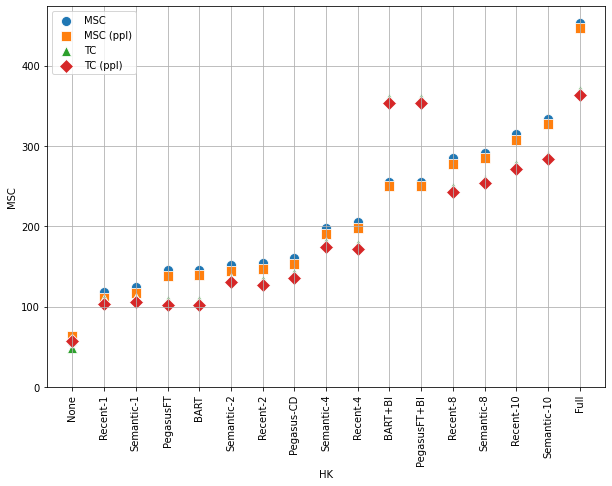

In [66]:
# plot df_fs_lengths using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# X-asix: (HK) index
# Each column as a scatter plot with proper legend
ax = plt.figure(figsize=(10,7))


markers = ["o", "s", "^", "D", "v"]  # list of unique markers
for idx, c in enumerate(df_fs_lengths):
    sns.scatterplot(data=df_fs_lengths, x=df_fs_lengths.index, y=c, label=c, s=100, marker=markers[idx % len(markers)])


# for c in df_fs_lengths:
#     sns.scatterplot(df_fs_lengths, x=df_fs_lengths.index, y=c, label=c, s=100)


plt.legend()
plt.xticks(rotation=90)
min_y = df_fs_lengths.min().min()
min_y = int(100*(min_y//100))
max_y = df_fs_lengths.max().max()
max_y = int(100*(max_y//100 + 1))
print(min_y, max_y)
plt.yticks(ticks=range(min_y, max_y, 100))

plt.grid()
# sns

In [67]:
# extract order of HK values based on average 'prompt'
# X = df_fs_lengths.groupby('HK').mean().sort_values('prompt').index.tolist()
# X_c = df_fs_lengths.groupby('HK').count()

# to_remove = ['BART+BI']

# for r in to_remove:
#     if r in X:
#         X.remove(r)


In [68]:
df_fs_lengths.to_csv(f"results/prompt_lengths{'_fs' if fs else '_zs'}.csv")